In [7]:
import tensorflow as tf
import zipfile

In [11]:
!curl -O https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip = zipfile.ZipFile('pizza_steak.zip')
zip.extractall()
zip.close()
zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  104M    0 15139    0     0  26307      0  1:09:23 --:--:--  1:09:23 26328
  0  104M    0  146k    0     0  96919      0  0:18:50  0:00:01  0:18:49 96949
  1  104M    1 1326k    0     0   531k      0  0:03:21  0:00:02  0:03:19  531k
 11  104M   11 12.1M    0     0  3539k      0  0:00:30  0:00:03  0:00:27 3540k
 25  104M   25 26.4M    0     0  6005k      0  0:00:17  0:00:04  0:00:13 6006k
 38  104M   38 40.6M    0     0  7575k      0  0:00:14  0:00:05  0:00:09 8458k
 51  104M   51 53.2M    0     0  8372k      0  0:00:12  0:00:06  0:00:06 10.6M
 65  104M   65 68.0M    0     0  9231k      0  0:00:11  0:00:07  0:00:04 13.2M
 76  104M   76 79.8M    0     0  9524k      0  0:00:11  0:00:08  0:00:03 13.3M
 90  104M   90 94.5M    0     0   9.8M      0  0:00

<zipfile.ZipFile [closed]>

In [14]:
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak\test
there are 0 directories and 250 images in pizza_steak\test\pizza
there are 0 directories and 250 images in pizza_steak\test\steak
there are 2 directories and 0 images in pizza_steak\train
there are 0 directories and 750 images in pizza_steak\train\pizza
there are 0 directories and 750 images in pizza_steak\train\steak


In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [2]:
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"image shape: {img.shape}")
    return img

['1105280.jpg']
image shape: (385, 512, 3)


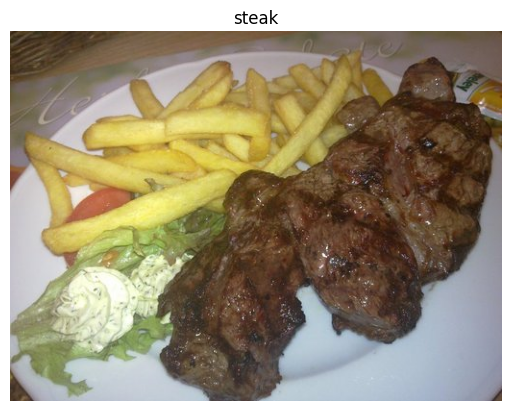

In [48]:
img=view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [52]:
tf.constant(img)

<tf.Tensor: shape=(385, 512, 3), dtype=uint8, numpy=
array([[[ 94,  75,  58],
        [ 83,  64,  47],
        [ 69,  51,  31],
        ...,
        [ 87,  66,  45],
        [ 78,  58,  34],
        [ 72,  52,  28]],

       [[ 78,  59,  42],
        [ 66,  47,  30],
        [ 56,  38,  18],
        ...,
        [ 95,  74,  53],
        [ 86,  65,  44],
        [ 79,  59,  35]],

       [[ 65,  48,  28],
        [ 57,  40,  20],
        [ 56,  39,  19],
        ...,
        [103,  82,  61],
        [ 95,  74,  53],
        [ 88,  67,  46]],

       ...,

       [[ 75,  56,  39],
        [ 77,  58,  41],
        [ 77,  58,  41],
        ...,
        [ 97,  78,  61],
        [101,  80,  61],
        [ 97,  75,  54]],

       [[ 77,  58,  41],
        [ 80,  61,  44],
        [ 77,  58,  41],
        ...,
        [ 99,  78,  61],
        [ 99,  78,  59],
        [ 93,  70,  52]],

       [[ 76,  59,  39],
        [ 80,  63,  43],
        [ 74,  57,  41],
        ...,
        [ 95,  74,  5

In [58]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1. / 255)
valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_dir = "/Artificial/TENSORFLOW/pizza_steak/train/"
test_dir = "/Artificial/TENSORFLOW/pizza_steak/test/"

#import data frm directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=42)

model1=Sequential()

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
